# Jonathan Halverson
# Tuesday, November 22, 2016
# Flight delay data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

### Load the flights data file

The flights.csv contains flight statistics for April 2014 with the following fields:

- flight date     (yyyy-mm-dd)
- airline id      (lookup in airlines.csv)
- flight num
- origin          (lookup in airports.csv)
- destination     (lookup in airports.csv)
- departure time  (HHMM)
- departure delay (minutes)
- arrival time    (HHMM)
- arrival delay   (minutes)
- air time        (minutes)
- distance        (miles)

In [9]:
names = ['flight_date', 'airline_id', 'flight_num', 'origin', 'destination',
         'departure_time', 'departure_delay', 'arrival_time', 'arrival_delay', 'air_time', 'distance']

In [13]:
flights_raw = pd.read_csv('flights.csv', parse_dates=True, names=names)
flights_raw.head(3)

,flight_date,airline_id,flight_num,origin,destination,departure_time,departure_delay,arrival_time,arrival_delay,air_time,distance
0,2014-04-01,19805,1,JFK,LAX,854,-6.0,1217,2.0,355.0,2475.0
1,2014-04-01,19805,2,LAX,JFK,944,14.0,1736,-29.0,269.0,2475.0
2,2014-04-01,19805,3,JFK,LAX,1224,-6.0,1614,39.0,371.0,2475.0


In [15]:
flights_raw.describe()

,airline_id,flight_num,departure_time,departure_delay,arrival_time,arrival_delay,air_time,distance
count,476881.000000,476881.000000,476881.000000,476881.000000,476881.000000,476881.000000,476881.000000,476881.000000
mean,19990.467498,2245.926028,1334.179537,8.313877,1485.241849,4.728578,111.049214,794.858501
std,398.494560,1841.066184,483.036281,33.345316,509.408145,35.507045,71.546394,596.005328
min,19393.000000,1.000000,0.000000,-55.000000,0.000000,-88.000000,8.000000,31.000000
25%,19790.000000,687.000000,926.000000,-5.000000,1107.000000,-12.000000,59.000000,361.000000
50%,19977.000000,1696.000000,1327.000000,-2.000000,1517.000000,-4.000000,91.000000,627.000000
75%,20366.000000,3486.000000,1733.000000,8.000000,1914.000000,9.000000,141.000000,1024.000000
max,21171.000000,8406.000000,2359.000000,1696.000000,2359.000000,1793.000000,664.000000,4983.000000


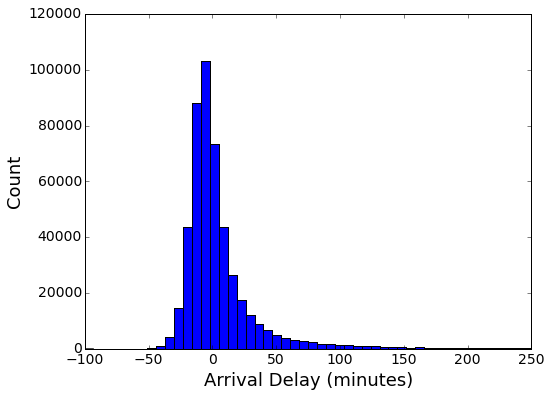

In [22]:
_ = plt.hist(flights_raw.arrival_delay, bins=50, range=[-100, 250])
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')

### Load the airlines data

In [25]:
airlines_raw = pd.read_csv('airlines.csv')
airlines_raw.head(3)

,Code,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC


### Load the airports data

In [24]:
airports_raw = pd.read_csv('airports.csv')
airports_raw.head(3)

,Code,Description
0,01A,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,"Lik, AK: Lik Mining Camp"


In [27]:
flights = flights_raw.merge(airlines_raw, left_on='airline_id', right_on='Code', how='inner')
flights.head(3)

,flight_date,airline_id,flight_num,origin,destination,departure_time,departure_delay,arrival_time,arrival_delay,air_time,distance,Code,Description
0,2014-04-01,19805,1,JFK,LAX,854,-6.0,1217,2.0,355.0,2475.0,19805,American Airlines Inc.: AA
1,2014-04-01,19805,2,LAX,JFK,944,14.0,1736,-29.0,269.0,2475.0,19805,American Airlines Inc.: AA
2,2014-04-01,19805,3,JFK,LAX,1224,-6.0,1614,39.0,371.0,2475.0,19805,American Airlines Inc.: AA


In [50]:
avg_delay_by_airline = flights.groupby('Description').agg({'arrival_delay': [np.size, np.mean]})
avg_delay_by_airline.sort_values([('arrival_delay', 'mean')], ascending=True, inplace=True)

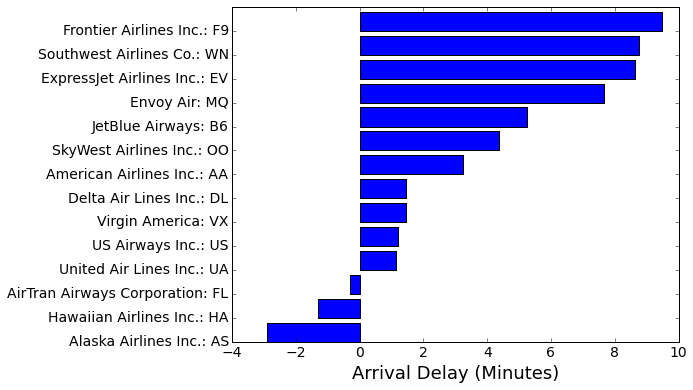

In [53]:
ints = [i for i in range(len(avg_delay_by_airline.index))]
plt.barh(ints, avg_delay_by_airline[('arrival_delay', 'mean')].values)
plt.yticks(ints, avg_delay_by_airline.index)
plt.xlabel('Arrival Delay (Minutes)')